# PROBLEM DEFINITION
  
- In semiconductor manufacturing, the production of integrated circuits involves multiple complex processes, including wafer fabrication. Wafers are thin, round substrates made of semiconductor materials, and they undergo various manufacturing steps to create microchips. The quality of these wafers is critical for ensuring the reliability and performance of the final IC's.

- The manufacturing process of semiconducter wafers is susceptible to various defects and faults that can compromise the quality and yield of IC's. These faults can result from contamination, equipment malfunctions or process variations. Detecting and classifying these faults early in the manufacturing process is essential to minimze waste and ensure product quality.

## GOAL
- The goal of this experiment notebook is to findout a succesful / generalized predictive classifier model that can accurately classify semiconducter wafers as either "Good" or "Bad" based on sensor data collected during the manufacturing process. 
- According to the domain knowledge of expertizes and regarding business priorities and potential consequences of false predicted cases, the cost function is calculated to be 10.FN + 1.FP 


****

## DATA EXPLORATION

[x]head, info, description

[x]quick profiling reports

[x] missing values analysis

[ ]duplicates

[ ]outliers

[ ]feature distributions

[ ]imbalance check

[ ]correlation analysis

[ ]notes

### NOTES
- all meaningful input features are float64 dtype
- wafer id can be removed
- no duplicated rows
- raw data is highly unscaled


In [35]:
import pandas as pd 
import numpy as np
import os 
import dtale


c:\Users\ayhan\Desktop\predictive-wafer-maintenance\venv\Lib\site-packages\dash\_jupyter.py:31: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


In [8]:
valid_dataset_dir = "../valid_feature_store/valid_training_data/"


In [11]:
csv_file_list = os.listdir(valid_dataset_dir)
df_merged = pd.DataFrame()
for file in csv_file_list:
    file_path = os.path.join(valid_dataset_dir,file)
    df = pd.read_csv(file_path)
    df_merged = pd.concat(objs=[df_merged,df]) # merged around axis=0

In [22]:
df_merged.head(10)

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,Wafer-504,2997.28,2357.99,2141.0667,1236.5212,0.9698,100.0,98.3344,0.1238,1.5973,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,Wafer-505,3025.10,2475.18,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.5525,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1
5,Wafer-506,2992.15,2538.05,2162.8445,1312.3198,0.8286,100.0,100.3633,0.1242,1.4509,...,NaN,0.5008,0.0115,0.0035,2.2979,-0.0012,0.0252,0.0081,0.0000,-1
6,Wafer-507,3055.87,2569.67,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4810,...,NaN,0.4967,0.0110,0.0032,2.2162,-0.0012,0.0252,0.0081,0.0000,-1
7,Wafer-508,2971.23,2626.13,2183.3444,1111.4499,1.5548,100.0,97.5311,0.1236,1.3906,...,NaN,0.5008,0.0154,0.0046,3.0695,-0.0012,0.0252,0.0081,0.0000,-1
8,Wafer-509,NaN,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,...,NaN,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1
9,Wafer-510,3028.53,2480.42,2220.4778,1531.6980,1.7751,100.0,107.6856,0.1249,1.5495,...,NaN,0.5011,0.0153,0.0039,3.0578,-0.0012,0.0252,0.0081,0.0000,-1


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1537 entries, 0 to 99
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(590), int64(1), object(1)
memory usage: 7.0+ MB


In [19]:
df_merged.duplicated().any()

False

In [24]:
df_merged.drop(columns=["Wafer"],inplace=True)

In [27]:
df_merged.describe().T 

,count,mean,std,min,25%,50%,75%,max
Sensor-1,1531.0,3015.024193,73.908774,2743.2400,2967.4650,3012.0900,3057.3900,3356.3500
Sensor-2,1530.0,2495.483771,80.495576,2158.7500,2452.1825,2498.8400,2538.5000,2846.4400
Sensor-3,1523.0,2200.370187,29.461460,2060.6600,2180.9666,2200.9889,2217.8667,2315.2667
Sensor-4,1523.0,1400.184797,443.937101,0.0000,1084.3779,1287.3538,1593.1220,3715.0417
Sensor-5,1523.0,4.255665,56.906664,0.6815,1.0177,1.3168,1.5291,1114.5366
...,...,...,...,...,...,...,...,...
Sensor-587,1537.0,0.021432,0.012398,-0.0169,0.0134,0.0207,0.0276,0.1028
Sensor-588,1537.0,0.016414,0.008768,0.0032,0.0106,0.0148,0.0203,0.0799
Sensor-589,1537.0,0.005268,0.002865,0.0010,0.0033,0.0046,0.0064,0.0286
Sensor-590,1537.0,99.777881,94.560344,0.0000,44.2355,71.5753,115.1005,737.3048


In [37]:
d= dtale.show(df_merged)

In [39]:
d.open_browser()

### EDA: Missing Value Analyis

In [61]:
def missing_values_table(dataframe:pd.DataFrame,is_return= False):
    na_cols = [col for col in dataframe.columns if dataframe[col].isna().sum()>0]
    na_data = dataframe[na_cols].isna().sum().sort_values(ascending=False)
    ratio = (dataframe[na_cols].isna().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat(objs=[na_data,np.round(ratio,2)],axis=1,keys= ["#missing","ratio"])
    print(missing_df,end="\n")
    if is_return:
        return (na_cols,missing_df)
    return missing_df

In [62]:
missing_table = missing_values_table(df_merged)

            #missing  ratio
Sensor-159      1399  91.02
Sensor-158      1399  91.02
Sensor-294      1399  91.02
Sensor-293      1399  91.02
Sensor-493      1311  85.30
...              ...    ...
Sensor-458         1   0.07
Sensor-457         1   0.07
Sensor-456         1   0.07
Sensor-455         1   0.07
Sensor-586         1   0.07

[534 rows x 2 columns]


In [63]:
filtered_missed_table = missing_table.query("ratio>60")

In [64]:
filtered_missed_table

,#missing,ratio
Sensor-159,1399,91.02
Sensor-158,1399,91.02
Sensor-294,1399,91.02
Sensor-293,1399,91.02
Sensor-493,1311,85.30
Sensor-86,1311,85.30
Sensor-359,1311,85.30
Sensor-221,1311,85.30
Sensor-384,988,64.28
Sensor-519,988,64.28


##### ->missing value analysis w/ target variable

In [89]:
def missing_vs_target(dataframe:pd.DataFrame,target:str,na_cols:list):
    i=0
    temp_df = dataframe.copy()
    for col in na_cols:
        temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isna(),1,0)
    
    na_flags= [col for col in temp_df.columns if "_NA_FLAG" in col ]
    

    
    for col in na_flags:
        table= pd.DataFrame({
            "Target_Mean": temp_df.groupby(col)[target].mean(),
            "count":temp_df.groupby(col)[target].count()
        })

        if (abs(table.iloc[1,0])> 0.30) and  (abs(table.iloc[1,0])< 0.70) :
            i+=1
            print(table,end="\n\n")

        
    print(i)

In [75]:
na_cols = missing_values_table(df_merged,is_return=True)[0]

            #missing  ratio
Sensor-159      1399  91.02
Sensor-158      1399  91.02
Sensor-294      1399  91.02
Sensor-293      1399  91.02
Sensor-493      1311  85.30
...              ...    ...
Sensor-458         1   0.07
Sensor-457         1   0.07
Sensor-456         1   0.07
Sensor-455         1   0.07
Sensor-586         1   0.07

[534 rows x 2 columns]


In [90]:
missing_vs_target(df_merged,"Good/Bad",na_cols)

C:\Users\ayhan\AppData\Local\Temp\ipykernel_7984\1119653738.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ayhan\AppData\Local\Temp\ipykernel_7984\1119653738.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ayhan\AppData\Local\Temp\ipykernel_7984\1119653738.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

                   Target_Mean  count
Sensor-54_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                   Target_Mean  count
Sensor-55_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                   Target_Mean  count
Sensor-56_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                   Target_Mean  count
Sensor-57_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                   Target_Mean  count
Sensor-58_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                   Target_Mean  count
Sensor-59_NA_FLAG                    
0                    -0.885192   1533
1                    -0.500000      4

                    Target_Mean  count
Sensor-191_NA_FLAG                    
0   

In [111]:
def missing_row_analysis(dataframe:pd.DataFrame):
    table= pd.DataFrame({
        "#missing":dataframe.isna().sum(axis=1).sort_values(ascending=False),
        "ratio": dataframe.isna().sum(axis=1).sort_values(ascending=False)/ dataframe.shape[0]*100
    })
    return table 

    

In [114]:
missing_row_analysis(df_merged)

,#missing,ratio
36,152,9.889395
34,148,9.629148
31,140,9.108653
22,100,6.506181
81,100,6.506181
...,...,...
22,4,0.260247
26,4,0.260247
43,4,0.260247
87,4,0.260247


### EDA: Outlier Detection

In [120]:
import matplotlib.pyplot as plt 

In [121]:
df_merged.columns 

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=591)

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axs = plt.subplots(10, len(df_merged.columns[:-1]), figsize=(16, 4))
plt.subplots_adjust(wspace=0.6)

# Iterate through selected columns and create box plots
for i, col in enumerate(df_merged.columns[2:4]):
    sns.boxplot(x=df_merged[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel("Values")

plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

Error in callback <function _draw_all_if_interactive at 0x000001CEC0C86520> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CEC3E98180> (for post_execute):


KeyboardInterrupt: 

In [152]:
def iqr_threshold(dataframe:pd.DataFrame,col_name:str,threshold:float=0.10,coeff=1.5):
    q1= dataframe[col_name].quantile(threshold)
    q3 = dataframe[col_name].quantile(1-threshold)
    iqr = q3-q1 
    upper = q3 + coeff*iqr 
    lower = q1 - coeff*iqr
    return lower,upper 


In [153]:
def detect_outliers(dataframe:pd.DataFrame,col_name,index=True):
    lower,upper = iqr_threshold(dataframe,col_name)
    filt = (dataframe[col_name] > upper) | (dataframe[col_name] < lower)
    if index:
        return (dataframe[filt].index, dataframe[filt])
    else: 
        return dataframe[filt]
        

In [154]:
for col in df_merged.columns[1:4]:
    indices, outliers = detect_outliers(df_merged,col)
    print(indices)

Index([], dtype='int64')
Index([5, 8, 13, 16, 19, 20, 55], dtype='int64')
Index([59, 82, 10, 90, 69, 81, 83, 91, 97, 75], dtype='int64')


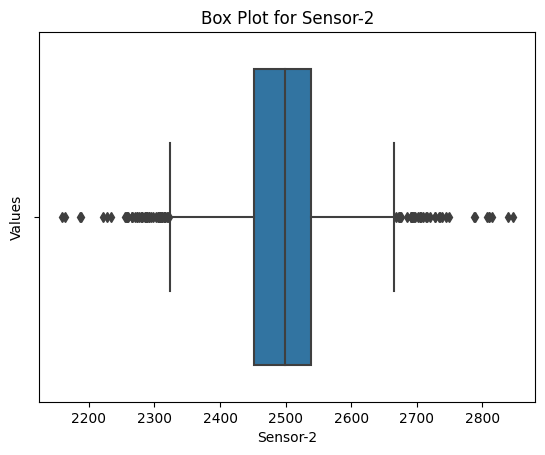

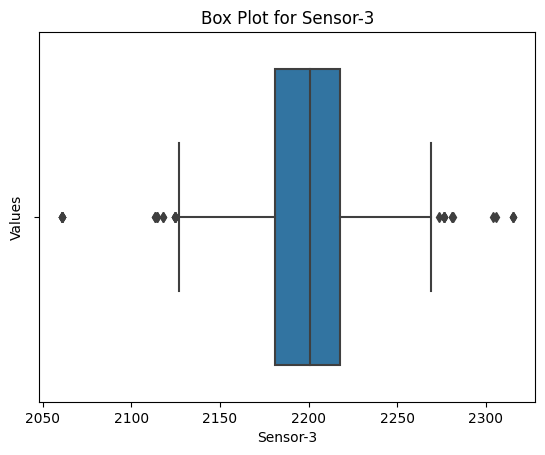

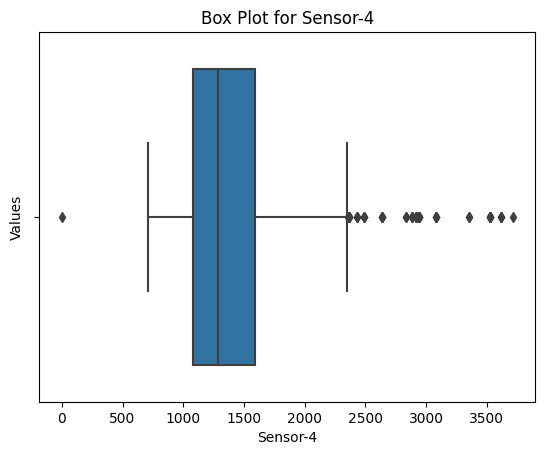

In [162]:

import seaborn as sns

for col in df_merged.columns[1:4]:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(x=df_merged[col])
    plt.title(f"Box Plot for {col}")
    plt.ylabel("Values")
    plt.show()

